In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Import PySwarms
import pyswarms as ps

## Load the dataset

In [3]:
data = load_iris()

In [4]:
# Store the features as X and the labels as y
X = data.data
y = data.target
num_samples = len(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Neural network architecture

In [5]:
n_inputs = 4
n_hidden = 20
n_classes = 3

In [6]:
def logits_function(p):
    # Roll-back the weights and biases
    W1 = p[0:80].reshape((n_inputs,n_hidden))
    b1 = p[80:100].reshape((n_hidden,))
    W2 = p[100:160].reshape((n_hidden,n_classes))
    b2 = p[160:163].reshape((n_classes,))
    
    # Perform forward propagation
    z1 = X.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    logits = a1.dot(W2) + b2 # Pre-activation in Layer 2
    return logits          # Logits for Layer 2
    

In [13]:
# Forward propagation for one particle
def forward_prop(params):
    logits = logits_function(params)
    
    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    
    # Compute for the negative log likelihood

    corect_logprobs = -np.log(probs[range(num_samples), y])
    print(corect_logprobs.shape)
    loss = np.sum(corect_logprobs) / num_samples
    
    return loss

In [14]:
# Forward propagation for entire swarm
def f(x):
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

## Performing PSO on the custom-function

In [15]:
%%time
# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Call instance of PSO
dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes 
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=1000)

2022-10-11 15:23:22,242 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   1%|▎                                                            |6/1000, best_cost=0.649

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:   2%|█                                                           |18/1000, best_cost=0.473

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:   3%|█▊                                                          |30/1000, best_cost=0.386

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:   4%|██▌                                                         |42/1000, best_cost=0.337

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:   5%|██▉                                                          |48/1000, best_cost=0.32

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:   6%|███▌                                                        |60/1000, best_cost=0.237

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:   7%|████▎                                                       |72/1000, best_cost=0.167

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:   8%|█████                                                       |84/1000, best_cost=0.105

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:   9%|█████▎                                                     |90/1000, best_cost=0.0678

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  10%|██████                                                     |102/1000, best_cost=0.053

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  11%|██████▌                                                   |114/1000, best_cost=0.0479

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  13%|███████▎                                                  |126/1000, best_cost=0.0442

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  14%|████████                                                  |138/1000, best_cost=0.0395

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  14%|████████▎                                                 |144/1000, best_cost=0.0368

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  16%|█████████▏                                                 |156/1000, best_cost=0.036

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  17%|█████████▋                                                |168/1000, best_cost=0.0355

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  18%|██████████▍                                               |180/1000, best_cost=0.0354

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  19%|███████████▏                                              |192/1000, best_cost=0.0352

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  20%|███████████▍                                              |198/1000, best_cost=0.0347

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  21%|████████████▏                                             |210/1000, best_cost=0.0344

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  22%|████████████▉                                             |222/1000, best_cost=0.0339

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  23%|█████████████▌                                            |234/1000, best_cost=0.0331

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  24%|█████████████▉                                            |240/1000, best_cost=0.0322

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  25%|██████████████▌                                           |252/1000, best_cost=0.0316

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  26%|███████████████▎                                          |264/1000, best_cost=0.0309

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  28%|████████████████                                          |276/1000, best_cost=0.0301

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  28%|████████████████▎                                         |282/1000, best_cost=0.0294

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  29%|█████████████████                                         |294/1000, best_cost=0.0289

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  31%|█████████████████▋                                        |306/1000, best_cost=0.0288

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  32%|██████████████████▍                                       |318/1000, best_cost=0.0287

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  32%|██████████████████▊                                       |324/1000, best_cost=0.0286

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  34%|███████████████████▊                                       |336/1000, best_cost=0.028

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  35%|████████████████████▏                                     |348/1000, best_cost=0.0279

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  36%|████████████████████▉                                     |360/1000, best_cost=0.0279

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  37%|█████████████████████▌                                    |372/1000, best_cost=0.0277

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  38%|█████████████████████▉                                    |378/1000, best_cost=0.0276

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  39%|██████████████████████▌                                   |390/1000, best_cost=0.0275

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  40%|███████████████████████▎                                  |402/1000, best_cost=0.0272

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  41%|████████████████████████                                  |414/1000, best_cost=0.0269

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  42%|████████████████████████▎                                 |420/1000, best_cost=0.0267

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  43%|█████████████████████████                                 |432/1000, best_cost=0.0262

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  44%|█████████████████████████▊                                |444/1000, best_cost=0.0256

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  46%|██████████████████████████▍                               |456/1000, best_cost=0.0248

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  47%|███████████████████████████▏                              |468/1000, best_cost=0.0246

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  47%|███████████████████████████▍                              |474/1000, best_cost=0.0246

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  49%|████████████████████████████▏                             |486/1000, best_cost=0.0245

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  50%|████████████████████████████▉                             |498/1000, best_cost=0.0245

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  51%|█████████████████████████████▌                            |510/1000, best_cost=0.0244

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  52%|██████████████████████████████▎                           |522/1000, best_cost=0.0243

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  53%|██████████████████████████████▉                           |534/1000, best_cost=0.0239

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  54%|███████████████████████████████▎                          |540/1000, best_cost=0.0237

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  55%|████████████████████████████████                          |552/1000, best_cost=0.0236

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  56%|████████████████████████████████▋                         |564/1000, best_cost=0.0236

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  57%|█████████████████████████████████                         |570/1000, best_cost=0.0235

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  58%|█████████████████████████████████▊                        |582/1000, best_cost=0.0235

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  59%|██████████████████████████████████▍                       |594/1000, best_cost=0.0234

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  61%|███████████████████████████████████▏                      |606/1000, best_cost=0.0231

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  62%|███████████████████████████████████▊                      |618/1000, best_cost=0.0229

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  62%|████████████████████████████████████▏                     |624/1000, best_cost=0.0228

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  64%|████████████████████████████████████▉                     |636/1000, best_cost=0.0224

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  65%|█████████████████████████████████████▌                    |648/1000, best_cost=0.0216

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  66%|██████████████████████████████████████▎                   |660/1000, best_cost=0.0203

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  67%|██████████████████████████████████████▋                   |666/1000, best_cost=0.0187

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  68%|███████████████████████████████████████▎                  |678/1000, best_cost=0.0182

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  69%|████████████████████████████████████████                  |690/1000, best_cost=0.0182

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  70%|████████████████████████████████████████▋                 |702/1000, best_cost=0.0181

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  71%|█████████████████████████████████████████▍                |714/1000, best_cost=0.0181

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  72%|█████████████████████████████████████████▊                |720/1000, best_cost=0.0181

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  73%|███████████████████████████████████████████▏               |732/1000, best_cost=0.018

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  74%|███████████████████████████████████████████▏              |744/1000, best_cost=0.0178

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  76%|███████████████████████████████████████████▊              |756/1000, best_cost=0.0175

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  76%|████████████████████████████████████████████▉              |762/1000, best_cost=0.017

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  77%|████████████████████████████████████████████▉             |774/1000, best_cost=0.0164

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  79%|█████████████████████████████████████████████▌            |786/1000, best_cost=0.0155

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  80%|██████████████████████████████████████████████▎           |798/1000, best_cost=0.0148

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  81%|██████████████████████████████████████████████▉           |810/1000, best_cost=0.0139

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  82%|███████████████████████████████████████████████▋          |822/1000, best_cost=0.0132

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  83%|████████████████████████████████████████████████          |828/1000, best_cost=0.0129

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  84%|████████████████████████████████████████████████▋         |840/1000, best_cost=0.0125

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  85%|█████████████████████████████████████████████████▍        |852/1000, best_cost=0.0123

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  86%|██████████████████████████████████████████████████        |864/1000, best_cost=0.0123

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  87%|██████████████████████████████████████████████████▍       |870/1000, best_cost=0.0122

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  88%|███████████████████████████████████████████████████▏      |882/1000, best_cost=0.0121

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  89%|████████████████████████████████████████████████████▋      |894/1000, best_cost=0.012

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  91%|████████████████████████████████████████████████████▌     |906/1000, best_cost=0.0118

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  91%|████████████████████████████████████████████████████▉     |912/1000, best_cost=0.0113

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  92%|██████████████████████████████████████████████████████▌    |924/1000, best_cost=0.011

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  94%|██████████████████████████████████████████████████████▎   |936/1000, best_cost=0.0109

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  95%|██████████████████████████████████████████████████████▉   |948/1000, best_cost=0.0108

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  95%|███████████████████████████████████████████████████████▎  |954/1000, best_cost=0.0108

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  97%|████████████████████████████████████████████████████████  |966/1000, best_cost=0.0108

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  98%|████████████████████████████████████████████████████████▋ |978/1000, best_cost=0.0107

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best:  99%|█████████████████████████████████████████████████████████▍|990/1000, best_cost=0.0107

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████|1000/1000, best_cost=0.0107
2022-10-11 15:23:41,176 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.010715033862670724, best pos: [ 6.02764396e-01  2.44466504e-01 -2.88908599e-01 -1.19131503e-01
 -9.57010640e-01 -3.51923000e-01 -5.38326127e-01  1.00709757e-02
  4.22074136e+00 -1.68213485e+00 -7.14596290e-01  5.96066440e+00
 -4.30333052e-01 -8.29747426e-01 -7.19247881e-01  1.89500625e+00
  5.50881218e-01  9.69000493e-02  4.82751163e-01  1.94678313e-01
 -2.73760212e-01  1.96733010e-01 -7.44520629e-01  5.86931350e-01
 -1.05179475e-01  1.25054733e+00  9.69656815e-01 -2.31328297e-02
 -5.19596433e-03 -3.89818933e+01 -6.67016767e-01 -8.27841217e-02
  2.81556045e+00 -3.86116080e+00 -1.70796132e-01  6.45189881e-01
  1.22219065e+00  2.03615648e+00 -5.33684875e-01  5.62602138e-01
  1.10837555e+00  1.69584186e+00  7.51033647e-01 -1.34829387e-01
  1.53416522e+00 -1.40970638e+00 -6

(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)
(150,)

## Checking the accuracy

In [9]:
def predict(pos):
    """
    Use the trained weights to perform class predictions.
    
    Inputs
    ------
    pos: numpy.ndarray
        Position matrix found by the swarm. Will be rolled
        into weights and biases.
    """
    logits = logits_function(pos)
    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [10]:
from sklearn import metrics

# evaluate on test set
yhat = predict(pos)
print(metrics.confusion_matrix(y, yhat))
print(metrics.classification_report(y, yhat))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



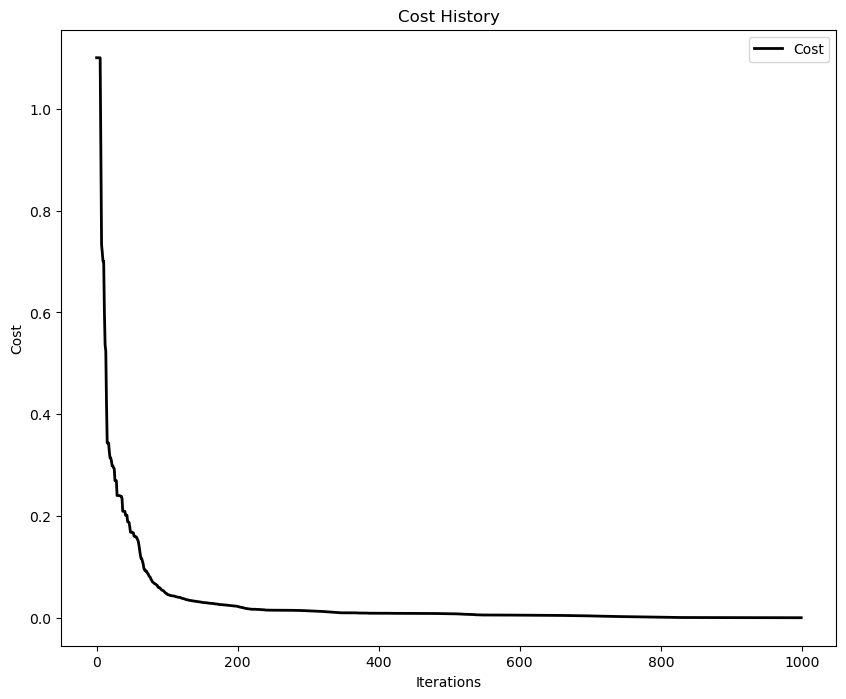

In [11]:
from pyswarms.utils import plotters

plotters.plot_cost_history(optimizer.cost_history)
plt.show()